Analyzing Employee Exit Surveys
===

The aim of this project is to analyze and the reasons behind employee exists in Department of Education, Training and Employment (DETE) and in Technical and Further Education (TAFE) institute in Queensland, Australia.
The main things that we are going to focus on are:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
import pandas as pd
import numpy as np
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [2]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Initial Exploration
---

In [4]:
dete_survey["Dissatisfaction with the department"].value_counts(normalize=True)

False    0.925791
True     0.074209
Name: Dissatisfaction with the department, dtype: float64

In [5]:
dete_survey["Job dissatisfaction"].value_counts(normalize=True).round(2)

False    0.89
True     0.11
Name: Job dissatisfaction, dtype: float64

In [6]:
dete_survey["SeparationType"].value_counts(normalize=True).round(2)

Age Retirement                          0.35
Resignation-Other reasons               0.18
Resignation-Other employer              0.11
Resignation-Move overseas/interstate    0.09
Voluntary Early Retirement (VER)        0.08
Ill Health Retirement                   0.07
Other                                   0.06
Contract Expired                        0.04
Termination                             0.02
Name: SeparationType, dtype: float64

According to DETE Survey: 
* 7.4% of the respondests are dissatisfied with their department.
* 11% of the respondents are dissataisfied with their jobs.
* The most common reason for seperation is age retirement with 35% followed by Resignation due to other reasons with 18%.

In [7]:
(tafe_survey["LengthofServiceOverall. Overall Length of Service at Institute (in years)"]
 .value_counts(normalize=True)
 .round(2))

Less than 1 year      0.25
1-2                   0.17
3-4                   0.16
11-20                 0.15
More than 20 years    0.12
5-6                   0.08
7-10                  0.07
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: float64

In [8]:
(tafe_survey["Reason for ceasing employment"]
 .value_counts(normalize=True)
 .round(2))

Resignation                 0.49
Contract Expired            0.18
Retrenchment/ Redundancy    0.15
Retirement                  0.12
Transfer                    0.04
Termination                 0.03
Name: Reason for ceasing employment, dtype: float64

According to TAFE Survey:
* 25% of the employees work less then a year in a company.
* The most common reason for ceasing is resignation with 49% followed by contract expiration with 18%.

It looks like the most common reason for the exits is resignation and retirement.

Identify Missing Values and Drop Unnecessary Columns
---

In [9]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [10]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [11]:
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")

We will drop the columns that we won't use in our analysis. We do this to make the dataframes easier to work with.

In [12]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

Clean Column Names
---

Next, we will standardize the column names.

In [13]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

In [14]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [15]:
tafe_survey_updated = tafe_survey_updated.rename({'Record ID': 'id'
,'CESSATION YEAR': 'cease_date'
,'Reason for ceasing employment': 'separationtype'
,'Gender. What is your Gender?': 'gender'
,'CurrentAge. Current Age': 'age'
,'Employment Type. Employment Type': 'employment_status'
,'Classification. Classification': 'position'
,'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
,'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}, axis=1)

In [16]:
tafe_survey_updated.head(2)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN


As we explained before, we changed some of the columns names to make our analysis easier.

Filter the Data
---

We will filter our dataframes for only resignations, and will assign the data for each survey to new dataframes.

In [17]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [18]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [19]:
dete_survey_updated["separationtype"] = dete_survey_updated["separationtype"].str.split("-").str[0]
dete_survey_updated["separationtype"].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [20]:
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"]=="Resignation"].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"]=="Resignation"].copy()

Verify the Data
---

Next, we will work with date columns.

In [21]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
07/2006      1
09/2010      1
Name: cease_date, dtype: int64

In [22]:
dete_resignations["cease_date"].isnull().sum()

11

In [23]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1]
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype("float")

In [24]:
dete_resignations["cease_date"].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [25]:
dete_resignations["dete_start_date"].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [26]:
tafe_resignations["cease_date"].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

Above, we observed the the years that employees started and finished their jobs. We found out that the years don't align with each other. We aren't concerned with analyzing the results by year, therefore we'll leave them as is.

Create a New Column
---

In [27]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

We want to explore the employees' years of service.
To observe this, we created a new column in dete_resignations dataframe called institute_service.

We calculated the years of service in the dete_survey_updated dataframe by subtracting the dete_start_date from the cease_date.

Identify Dissatisfied Employees
---

Next, we will identify the employees by their dissatisfactions. We will classifiy them as "dissatisfied" if they resigned due to any of the reasons listed below:

1. tafe_survey_updated:
 * Contributing Factors. Dissatisfaction
 * Contributing Factors. Job Dissatisfaction
2. dafe_survey_updated:
 * job_dissatisfaction
 * dissatisfaction_with_the_department
 * physical_work_environment
 * lack_of_recognition
 * lack_of_job_security
 * work_location
 * employment_conditions
 * work_life_balance
 * workload

In [28]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [29]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [30]:
#function to classify dissatisfied employees
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

In [31]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)

In [32]:
tafe_resignations_up = tafe_resignations.copy()

In [33]:
tafe_resignations_up["dissatisfied"].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [34]:
dete_resignations["dissatisfied"] = dete_resignations[["job_dissatisfaction",
"dissatisfaction_with_the_department",
"physical_work_environment",
"lack_of_recognition",
"lack_of_job_security",
"work_location",
"employment_conditions",
"work_life_balance",
"workload"]].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()

In [35]:
dete_resignations_up["dissatisfied"].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

Above, we identified the number of employees that were dissatisfied for any reason both in dete and tafe surveys. If the value is True, then the employee is classified as dissatisfied.

Combine the Data
---

Next, we will combine both surveys in one dataframe.

In [36]:
dete_resignations_up["institute"] = "DETE"

In [37]:
tafe_resignations_up["institute"] = "TAFE"

In [38]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up], ignore_index=True)

In [39]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [40]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()

In [41]:
combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
institute            651
separationtype       651
dtype: int64

Above, we dropped the null values that we don't need for our analysis. We dropped the columns with less than 500 non null values.

Clean the Service Column
---

Next, we'll clean the institute_service column and categorize employees according to the following definitions:

* New: Less than 3 years in the workplace
* Experienced: 3-6 years in the workplace
* Established: 7-10 years in the workplace
* Veteran: 11 or more years in the workplace

In [42]:
combined_updated["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
21.0                   3
39.0                   3
30.0                   2
25.0                   2
26.0                   2
28.0                   2
36.0                   2


In [43]:
combined_updated["institute_service_up"] = (combined_updated["institute_service"]
                                            .astype("str")
                                            .str.extract(r"(\d+)")
                                            .astype("float"))

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


In [44]:
combined_updated["institute_service_up"].value_counts(dropna=False).sort_index()

 0.0      20
 1.0     159
 2.0      14
 3.0      83
 4.0      16
 5.0      56
 6.0      17
 7.0      34
 8.0       8
 9.0      14
 10.0      6
 11.0     30
 12.0      6
 13.0      8
 14.0      6
 15.0      7
 16.0      5
 17.0      6
 18.0      5
 19.0      3
 20.0     17
 21.0      3
 22.0      6
 23.0      4
 24.0      4
 25.0      2
 26.0      2
 27.0      1
 28.0      2
 29.0      1
 30.0      2
 31.0      1
 32.0      3
 33.0      1
 34.0      1
 35.0      1
 36.0      2
 38.0      1
 39.0      3
 41.0      1
 42.0      1
 49.0      1
NaN       88
Name: institute_service_up, dtype: int64

Next, we will create a function to define the career stages as we explained before.

In [45]:
#function to convert years of service to categories
def career(x):
    if x >= 11:
        return "Veteran"
    elif 7 <= x <11:
        return "Established"
    elif 3 <= x <7:
        return "Experienced"
    elif pd.isnull(x):
        return np.nan
    else:
        return "New"

In [46]:
combined_updated["service_cat"] = combined_updated["institute_service_up"].apply(career)

In [47]:
combined_updated["service_cat"].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

Perform Initial Analysis
---

In [48]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [49]:
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)

In [50]:
dis_pivot = combined_updated.pivot_table(index="service_cat", values="dissatisfied")

In [51]:
%matplotlib inline

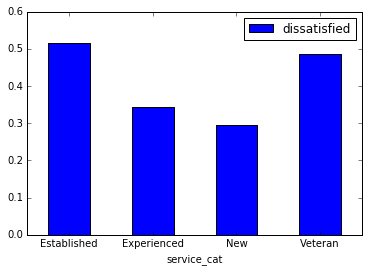

In [52]:
dis_pivot.plot(kind="bar", rot=0);

In the above bar plot, we can see that that the employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service.

Resignation Analysis Based On Ages
---

Next, we will analyze resignations due to dissatisfaction based on ages.

In [53]:
combined_updated

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,institute_service_up,service_cat
0,36-40,2012.0,False,Permanent Full-time,Female,4.000000e+00,DETE,7,Teacher,Resignation,7.0,Established
1,41-45,2012.0,True,Permanent Full-time,Female,6.000000e+00,DETE,18,Guidance Officer,Resignation,18.0,Veteran
2,31-35,2012.0,False,Permanent Full-time,Female,9.000000e+00,DETE,3,Teacher,Resignation,3.0,Experienced
3,46-50,2012.0,True,Permanent Part-time,Female,1.000000e+01,DETE,15,Teacher Aide,Resignation,15.0,Veteran
4,31-35,2012.0,False,Permanent Full-time,Male,1.200000e+01,DETE,3,Teacher,Resignation,3.0,Experienced
5,36-40,2012.0,False,Permanent Full-time,Female,1.300000e+01,DETE,14,Teacher,Resignation,14.0,Veteran
6,31-35,2012.0,True,Permanent Full-time,Male,1.500000e+01,DETE,5,Teacher,Resignation,5.0,Experienced
7,61 or older,2012.0,True,Permanent Part-time,Male,1.700000e+01,DETE,NaN,Teacher Aide,Resignation,NaN,NaN
8,56-60,2012.0,False,Permanent Full-time,Male,2.100000e+01,DETE,30,Teacher,Resignation,30.0,Veteran
9,51-55,2012.0,False,Permanent Part-time,Female,2.200000e+01,DETE,32,Cleaner,Resignation,32.0,Veteran


In [54]:
combined_updated["age"].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

Age column needs a bit cleaning.

In [55]:
combined_updated["age"] = combined_updated["age"].astype("str")

In [63]:
combined_updated["clean_age"] = combined_updated["age"].str.replace("  ","-")

In [65]:
combined_updated["clean_age"].value_counts().sort_index()

20 or younger    10
21-25            62
26-30            67
31-35            61
36-40            73
41-45            93
46-50            81
51-55            71
56 or older      29
56-60            26
61 or older      23
nan              55
Name: clean_age, dtype: int64

In [66]:
combined_updated["clean_age"] = combined_updated["clean_age"].str.replace("56-60","56 or older")

In [67]:
combined_updated["clean_age"] = combined_updated["clean_age"].str.replace("61 or older","56 or older")

In [73]:
combined_updated["clean_age"].value_counts().sort_index()

20 or younger    10
21-25            62
26-30            67
31-35            61
36-40            73
41-45            93
46-50            81
51-55            71
56 or older      78
nan              55
Name: clean_age, dtype: int64

In [80]:
combined_updated["clean_age"] = combined_updated["clean_age"].str.replace("nan","Unknown")

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


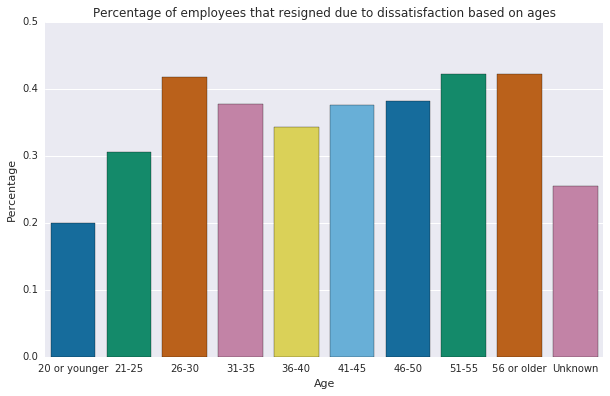

In [94]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x = combined_updated["clean_age"], y = combined_updated["dissatisfied"], 
                 estimator = np.mean, ci=0, palette = "colorblind",
                order=combined_updated["clean_age"].value_counts().sort_index().index)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(left = False, bottom = False)
ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5])
ax.set(xlabel='Age', ylabel='Percentage')
ax.set_title("Percentage of employees that resigned due to dissatisfaction based on ages")
plt.show()

We can see that there two peaks in the graph above. Employees at the age group of 26-30 and employees who are older than 50, resigned due to some type of dissatisfaction.

Let's take a closer look at the institutes and compare percentage of resignations due to dissatisfaction.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


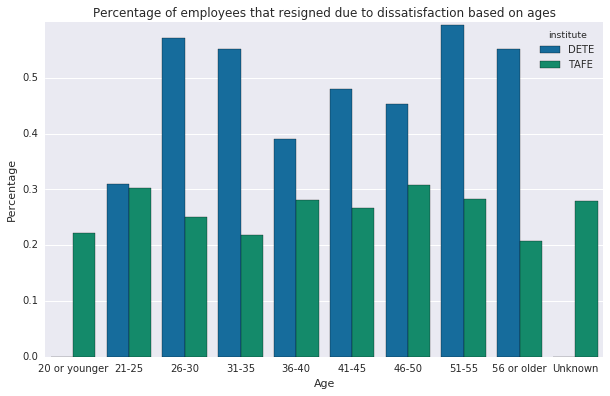

In [98]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x = combined_updated["clean_age"], 
                 y = combined_updated["dissatisfied"],
                 hue = combined_updated["institute"],
                 estimator = np.mean, ci=0, palette = "colorblind",
                order=combined_updated["clean_age"].value_counts().sort_index().index)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(left = False, bottom = False)
ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5])
ax.set(xlabel='Age', ylabel='Percentage')
ax.set_title("Percentage of employees that resigned due to dissatisfaction based on ages")
plt.show()

We can see that the resignations due to dissatisfaction percentages are different for each survey. The respondents of DETE survey has more dissatisfied employees.

Analyzing DETE Resignations
---

In [120]:
dete_res_reasons = dete_survey_updated.iloc[:,10:27]

Below we seperated only the columns that has 

In [121]:
dete_res_reasons.sum().sort_values(ascending=False)

work_life_balance                      217
ill_health                             112
job_dissatisfaction                     89
workload                                87
career_move_to_private_sector           80
relocation                              68
maternity/family                        62
dissatisfaction_with_the_department     61
lack_of_recognition                     57
study/travel                            37
interpersonal_conflicts                 34
employment_conditions                   34
traumatic_incident                      28
lack_of_job_security                    28
work_location                           27
career_move_to_public_sector            22
physical_work_environment               16
dtype: int64

We can see that the most common reason of resignation is work life balance which is a very valid reason. Now, let's visualize these reasons to have a better understanding of the proportions for reasons.

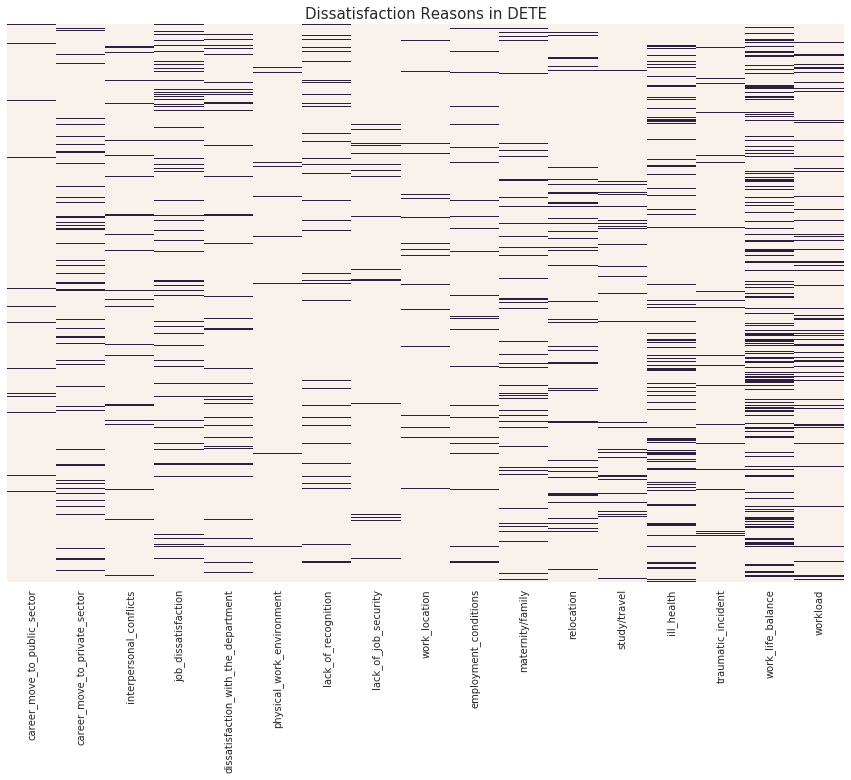

In [124]:
plt.figure(figsize=(15,10))
sns.heatmap(dete_res_reasons, cbar=False)
plt.tick_params(left=False, labelleft=False)
plt.title('Dissatisfaction Reasons in DETE', fontsize=15)
plt.show()

Conclusion
---

In this project, we analyzed to employee surveys from Australia. We found out that:
 * Older and more experienced employees are more tend to be dissatisfied. This can be due to a higher expectation. When employees have more experience in a company, they tend to have more expectaions and goals like a pay raise or promotion.
 * Younger employees are resigning due several different reasons.